In [1]:
import pandas as pd
import numpy as np
from sklearn import cluster
from sklearn.cluster import KMeans

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from google.colab import files
uploaded= files.upload()

Saving Starbucks_Transformed_Data.csv to Starbucks_Transformed_Data.csv


In [4]:
df = pd.read_csv('Starbucks_Transformed_Data.csv', index_col=0)
df.head()

,customerId,age,gender,income,bogo_offer_completed,bogo_offer_received,bogo_offer_viewed,bogo_net_reward,discount_offer_completed,discount_offer_received,discount_offer_viewed,discount_net_reward,informational_offer_received,informational_offer_viewed,total_offer_completed,total_offer_viewed,total_offer_received,total_rewards,Average_transaction_amount,DaysFromLastPurchase,Average_bogo_duration,Average_bogo_difficulty,Average_discount_duration,Average_discount_difficulty
0,78afa995795e4d85b5d9ceeca43f5fef,75,F,100000.0,3,3,3,6.666667,0,0,0,NaN,1,1,3,4,4,60.0,22.752857,2.00,152.0,6.666667,NaN,NaN
1,a03223e636434f42ac4c3df47e8bac43,118,U,64000.0,0,0,0,NaN,0,3,2,5.0,2,1,0,3,5,25.0,1.550000,0.50,NaN,NaN,240.0,20.0
2,e2127556f4f64592b11af22de27a7932,68,M,70000.0,1,1,1,5.000000,1,2,2,2.0,1,0,2,3,4,25.0,19.243333,0.00,168.0,5.000000,211.2,10.0
3,8ec6ce2a7e7949b1bf142def7d0e0586,118,U,64000.0,0,1,1,10.000000,0,3,3,2.0,1,1,0,5,5,32.0,NaN,0.75,120.0,10.000000,216.0,10.0
4,68617ca6246f4fbc85e91a2a49552598,118,U,64000.0,0,3,2,8.000000,0,2,2,2.5,0,0,0,4,5,50.0,0.120000,0.25,148.8,8.000000,168.0,8.5


In [5]:
def find_Min_Max(col_name):
  print(f" min {col_name} is {df[col_name].min()} ,\n max {col_name} is {df[col_name].max()}")
  return

In [6]:
find_Min_Max('age')
find_Min_Max('income')
print(f"income values: \n{df['income'].unique()}")

 min age is 18 ,
 max age is 118
 min income is 30000.0 ,
 max income is 120000.0
income values: 
[100000.  64000.  70000.  53000.  51000.  57000.  71000.  69000.  88000.
  41000.  89000.  33000.  63000.  40000.  30000.  80000.  48000.  38000.
  92000.  96000.  93000.  35000.  56000.  44000.  87000.  52000.  76000.
  72000. 117000.  55000. 112000.  85000.  91000. 107000.  66000.  58000.
  74000.  98000. 119000.  84000.  54000.  49000.  73000.  78000.  31000.
  60000. 114000.  47000.  95000.  37000.  46000.  79000.  67000.  68000.
  50000.  42000.  77000.  83000.  62000.  61000. 105000. 118000.  99000.
  45000. 106000.  59000. 103000. 101000.  36000.  86000.  34000.  39000.
  94000.  75000.  90000.  32000.  81000. 110000.  97000. 109000. 104000.
 113000.  65000.  43000.  82000. 108000. 115000. 102000. 116000. 111000.
 120000.]


In [7]:
bins =     [18,      25,      35,    45,    55,    70,   80, 118]
labels = ['18-25', '26-35', '35-45' ,'46-55', '56-70', '70-80', '81+']
df['age_range'] = pd.cut(df.age, bins, labels = labels,include_lowest = True)

In [8]:
bins_income = [10000, 30000, 50000, 70000, 90000, 100000, 120000] # bins for grouped data
labels_income = ['\$30,000 and below', '\$31,000 - $50,000', '\$51,000 - $70,000', '\$71,000 - $90,000', "\$91,000 - $110,000", '$111,000+'] # labels of grouped data
df['income_range'] = pd.cut(df.income, bins_income, labels = labels_income,include_lowest = True) 

In [9]:
df=df.replace(np.nan,0)

In [10]:
def calculate_percentage(feature):
  feature_percentage=feature.value_counts()/len(feature)*100
  return feature_percentage


def create_Barchart(df, title, x_label, y_label, kind):
    df.plot(kind= kind, figsize=(10,6)) # plots bar chart
    plt.suptitle(title) # title of plot
    plt.xlabel(x_label) # label for x axis
    plt.ylabel(y_label); # label for y axis
    plt.xticks(rotation=45)
    return

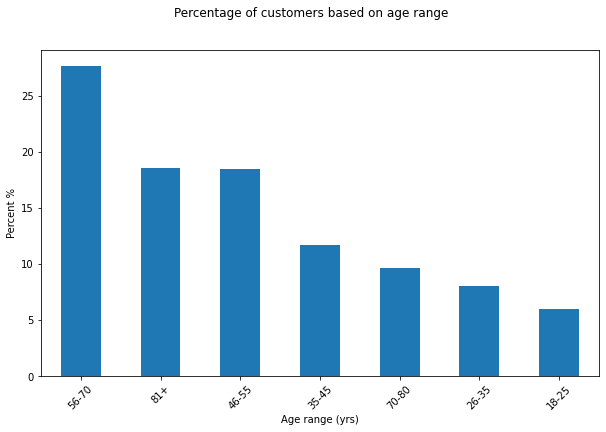

In [11]:
age_percentage=calculate_percentage(df['age_range'])
create_Barchart(age_percentage, 'Percentage of customers based on age range', 'Age range (yrs)', 'Percent %', 'bar')

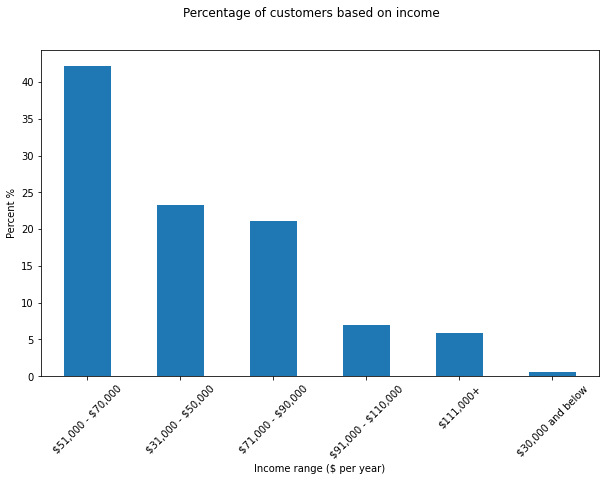

In [12]:
income_percentage = calculate_percentage(df['income_range'])
create_Barchart(income_percentage, 'Percentage of customers based on income', 'Income range ($ per year)', 'Percent %', 'bar')

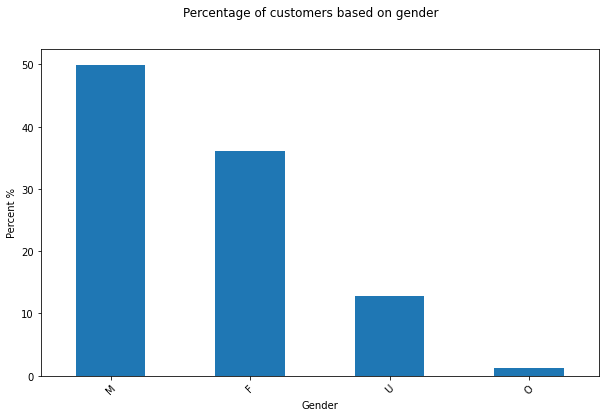

In [13]:
gender_percentage=calculate_percentage(df['gender'])
create_Barchart(gender_percentage, 'Percentage of customers based on gender', 'Gender', 'Percent %', 'bar')

Hypothesis : There is a relation between total rewards and average transaction amount. 
I feel that customers who gets more rewards tend to spend more. Lets check if there is a relation between these features.

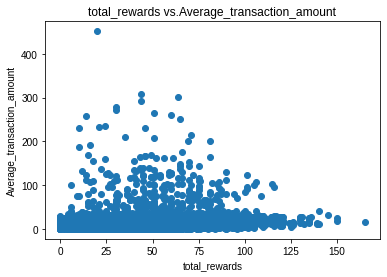

In [14]:
plt.scatter(data = df, x = 'total_rewards', y = 'Average_transaction_amount');
plt.title('total_rewards vs.Average_transaction_amount');
plt.xlabel('total_rewards');
plt.ylabel('Average_transaction_amount');
plt.style.use('seaborn');

Intrestingly there is no clear indication that if a customer gets more rewards , he/she will spend more amount.
So, our hypothesis is rejected.

In [15]:
df['bogo_offer_completed_percent']=df['bogo_offer_completed']/df['bogo_offer_received']
df['discount_offer_completed_percent']=df['discount_offer_completed']/df['discount_offer_received']
df=df.replace(np.nan,0)

In [16]:
df['gender'].replace({'U':0,'O':1,'F':2,'M':3},inplace=True)

In [17]:
df.columns

Index(['customerId', 'age', 'gender', 'income', 'bogo_offer_completed',
       'bogo_offer_received', 'bogo_offer_viewed', 'bogo_net_reward',
       'discount_offer_completed', 'discount_offer_received',
       'discount_offer_viewed', 'discount_net_reward',
       'informational_offer_received', 'informational_offer_viewed',
       'total_offer_completed', 'total_offer_viewed', 'total_offer_received',
       'total_rewards', 'Average_transaction_amount', 'DaysFromLastPurchase',
       'Average_bogo_duration', 'Average_bogo_difficulty',
       'Average_discount_duration', 'Average_discount_difficulty', 'age_range',
       'income_range', 'bogo_offer_completed_percent',
       'discount_offer_completed_percent'],
      dtype='object')

In [18]:
df1= df.drop(['customerId','age_range','income_range'],axis=1)

In [19]:
df1.columns

Index(['age', 'gender', 'income', 'bogo_offer_completed',
       'bogo_offer_received', 'bogo_offer_viewed', 'bogo_net_reward',
       'discount_offer_completed', 'discount_offer_received',
       'discount_offer_viewed', 'discount_net_reward',
       'informational_offer_received', 'informational_offer_viewed',
       'total_offer_completed', 'total_offer_viewed', 'total_offer_received',
       'total_rewards', 'Average_transaction_amount', 'DaysFromLastPurchase',
       'Average_bogo_duration', 'Average_bogo_difficulty',
       'Average_discount_duration', 'Average_discount_difficulty',
       'bogo_offer_completed_percent', 'discount_offer_completed_percent'],
      dtype='object')

In [20]:
X = df[['age', 'gender', 'income', 'bogo_offer_completed',
       'bogo_offer_received', 'bogo_offer_viewed', 'bogo_net_reward',
       'discount_offer_completed', 'discount_offer_received',
       'discount_offer_viewed', 'discount_net_reward',
       'informational_offer_received', 'informational_offer_viewed',
       'total_offer_completed', 'total_offer_viewed', 'total_offer_received',
       'total_rewards', 'Average_transaction_amount', 'DaysFromLastPurchase',
       'Average_bogo_duration', 'Average_bogo_difficulty',
       'Average_discount_duration', 'Average_discount_difficulty',
       'bogo_offer_completed_percent', 'discount_offer_completed_percent']]


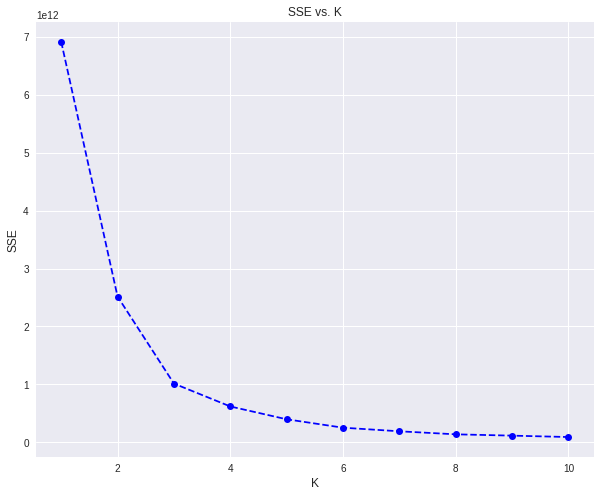

In [21]:
scores = []

for k in range(1,11):
    kmeans = KMeans(k)  
    model = kmeans.fit(X) 
    scores.append(abs(model.score(X)))
    
plt.figure(figsize=(10,8))
plt.plot(range(1,11), scores, linestyle='--', marker='o', color='b');
plt.xlabel('K', fontsize = 12);
plt.ylabel('SSE', fontsize = 12);
plt.title('SSE vs. K', fontsize = 12);

In [22]:
from sklearn.metrics import silhouette_score

for i in range(2, 20):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(X)
    clusters = kmeans.predict(X)
    silhouette_avg = silhouette_score(X, clusters)
    print("For n_clusters = ", i,"The avg silhouette_score is :", silhouette_avg)

For n_clusters =  2 The avg silhouette_score is : 0.5621565920197449
For n_clusters =  3 The avg silhouette_score is : 0.5970468902748831
For n_clusters =  4 The avg silhouette_score is : 0.5715096083952397
For n_clusters =  5 The avg silhouette_score is : 0.5722969463222926
For n_clusters =  6 The avg silhouette_score is : 0.5966928439198901
For n_clusters =  7 The avg silhouette_score is : 0.6019242594112414
For n_clusters =  8 The avg silhouette_score is : 0.5982629522191903
For n_clusters =  9 The avg silhouette_score is : 0.5914169440416391
For n_clusters =  10 The avg silhouette_score is : 0.5930621179421767
For n_clusters =  11 The avg silhouette_score is : 0.5882896521622888
For n_clusters =  12 The avg silhouette_score is : 0.5931622078080295
For n_clusters =  13 The avg silhouette_score is : 0.5890580909957067
For n_clusters =  14 The avg silhouette_score is : 0.5873000388263183
For n_clusters =  15 The avg silhouette_score is : 0.5919995620851076
For n_clusters =  16 The avg

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


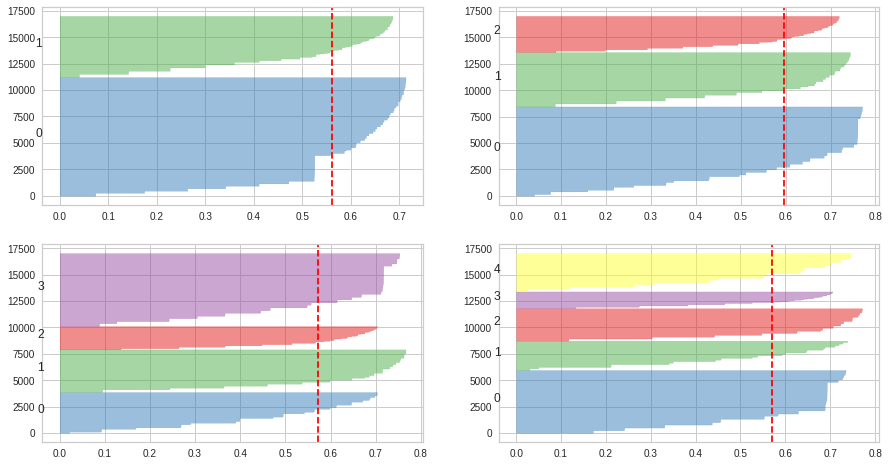

In [23]:
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(X)

Based on the Silhouette analysis, all clusters have above-average silhouette scores but wide fluctuations in size were seen in cluster no 2 and 5,
and bearing the results of the Elbow-method 4 clusters could be the optimal choice 

In [24]:
clust = KMeans(n_clusters=4)
df['Cluster'] = clust.fit_predict(df1)


In [25]:
def create_sns_countplot(col_name,hue_h,a1,a2,Chart_title,x_label,y_label,xlim_l,xlim_u):
  sns.countplot(data = df, x = col_name, hue = hue_h, ax = axes[a1,a2])
  axes[a1,a2].set_title(Chart_title)
  axes[a1,a2].set_xlabel(x_label)
  axes[a1,a2].set_ylabel(y_label)
  axes[a1,a2].set_xlim([xlim_l,xlim_u]);
  return

def create_barh(data_perct,offer_tick_labels,b1,b2,Chart_title,x_label,y_label):
  y_pos = np.arange(len(data_perct))
  axes[b1,b2].barh(y_pos, data_perct, tick_label = offer_tick_labels)
  axes[b1,b2].set_xlim([0, 1])
  axes[b1,b2].set_title(Chart_title)
  axes[b1,b2].set_xlabel(x_label)
  axes[b1,b2].set_ylabel(y_label)
  return

def create_hist(avg_spent_data,labels_hist,legend_title,h1,h2,Chart_title,x_label,y_label,xlim_l,xlim_u):
  axes[h1,h2].hist(avg_spent_data, bins = avg_spent_bins, stacked = True)
  axes[h1,h2].legend(title = legend_title, labels = labels_hist);
  axes[h1,h2].set_title(Chart_title)
  axes[h1,h2].set_xlabel(x_label)
  axes[h1,h2].set_ylabel(y_label)
  axes[h1,h2].set_xlim([xlim_l,xlim_u]);
  return

def create_scatter_plot(col_x,col_y,hue_h,s1,s2,Chart_title,label_x,label_y):
  sns.scatterplot(data =df, x = col_x, y = col_y, hue = hue_h, ax = axes[s1,s2])
  axes[s1,s2].set_title(Chart_title)
  axes[s1,s2].set_xlabel(label_x)
  axes[s1,s2].set_ylabel(label_y)
  return

## **Analyzing Clusters**

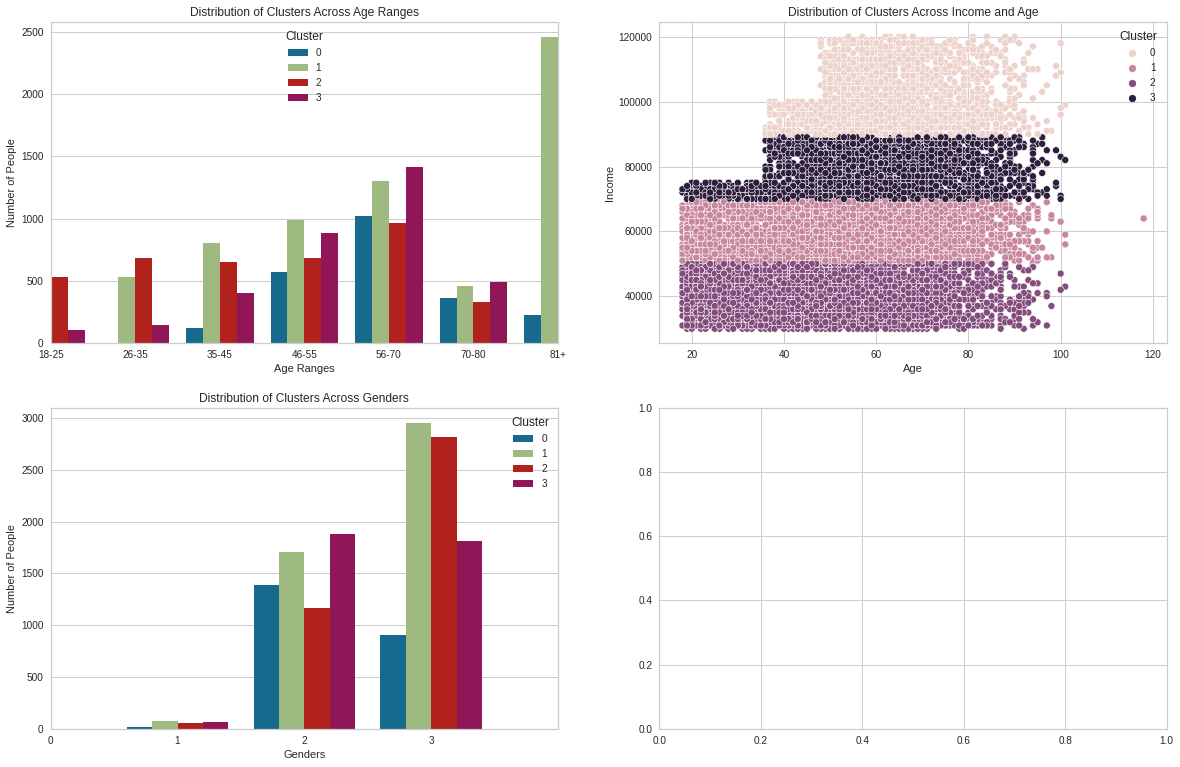

In [26]:
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (20, 13))

#Visualizing clusters across age ranges
create_sns_countplot('age_range','Cluster',0,0,'Distribution of Clusters Across Age Ranges','Age Ranges','Number of People',0,6)

#Visualizing clusters across incomes and ages
create_scatter_plot('age','income','Cluster',0,1,'Distribution of Clusters Across Income and Age','Age','Income')

#Visualizing clusters across age ranges
create_sns_countplot('gender','Cluster',1,0,'Distribution of Clusters Across Genders','Genders','Number of People',0,4)


In [27]:
# find_Min_Max('Average_transaction_amount')
# find_Min_Max('total_offer_received')
# find_Min_Max('bogo_offer_received')
# find_Min_Max('discount_offer_received')

cols = ['Average_transaction_amount','total_offer_received','bogo_offer_received','discount_offer_received']
for col in cols:
  find_Min_Max(col)

 min Average_transaction_amount is 0.0 ,
 max Average_transaction_amount is 451.47
 min total_offer_received is 0 ,
 max total_offer_received is 6
 min bogo_offer_received is 0 ,
 max bogo_offer_received is 6
 min discount_offer_received is 0 ,
 max discount_offer_received is 6


/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


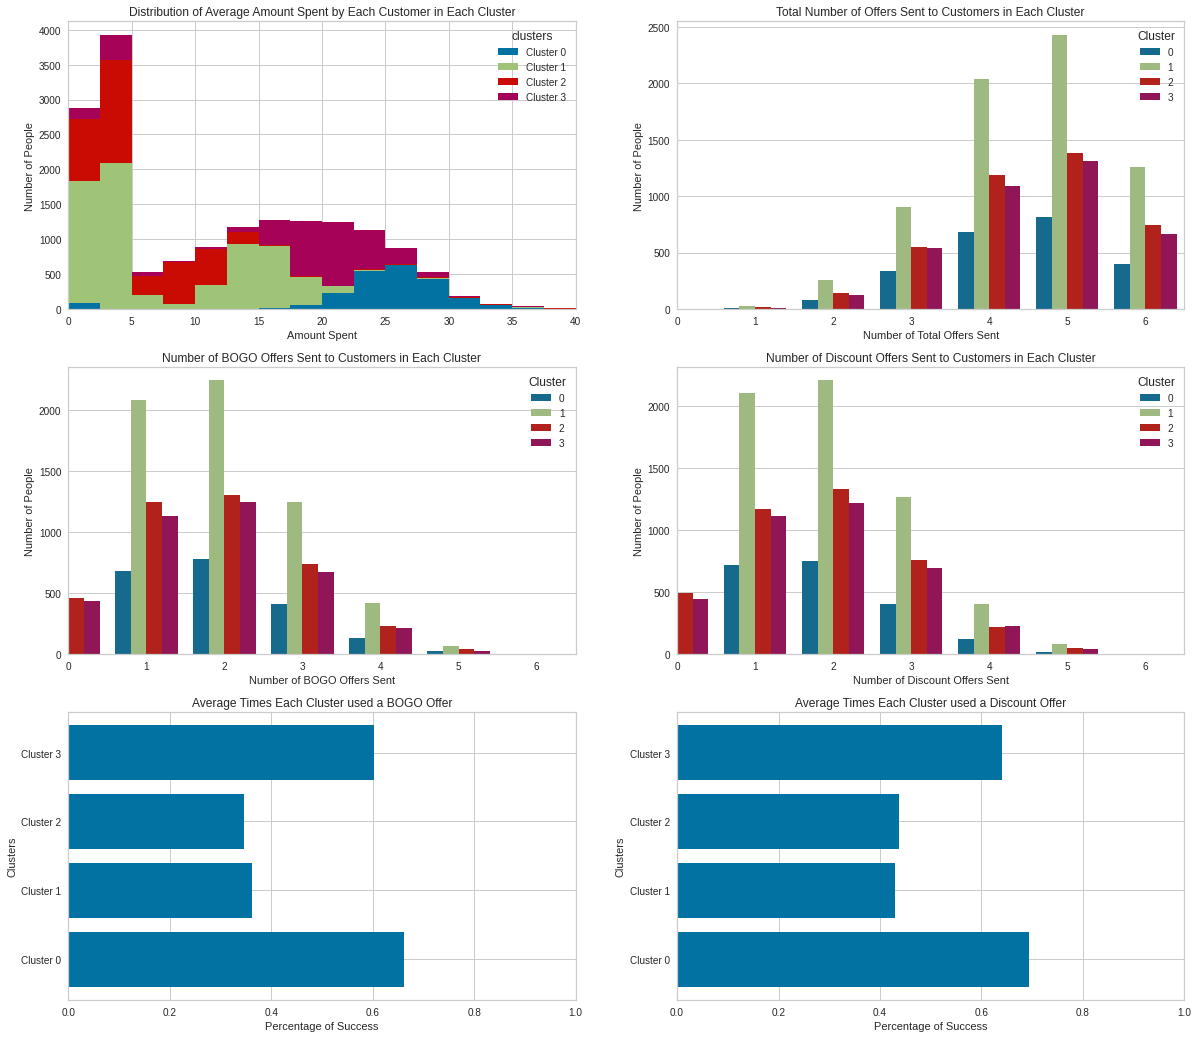

In [28]:
fig, axes = plt.subplots(nrows = 3, ncols = 2, figsize = (20, 18))
avg_spent_bins = np.arange(min(df['Average_transaction_amount']), max(df['Average_transaction_amount'] + 2.5), 2.5)
avg_spent_data=[]
for i in range(4):
  avg_spent_i = df[df['Cluster']== i]['Average_transaction_amount']
  avg_spent_data.append(avg_spent_i)


labels_his = ['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3']
create_hist(avg_spent_data,labels_his,'clusters',0,0,'Distribution of Average Amount Spent by Each Customer in Each Cluster','Amount Spent','Number of People',0, 40)
 

#Visualizing the total number of offers sent to the customers
create_sns_countplot('total_offer_received','Cluster',0,1,'Total Number of Offers Sent to Customers in Each Cluster','Number of Total Offers Sent','Number of People',0, 6.5)

#Visualizing the number of BOGO offers sent to the customers
create_sns_countplot('bogo_offer_received','Cluster',1,0,'Number of BOGO Offers Sent to Customers in Each Cluster','Number of BOGO Offers Sent','Number of People',0, 6.5)

#Visualizing the number of discount offers sent to the customers
create_sns_countplot('discount_offer_received','Cluster',1,1,'Number of Discount Offers Sent to Customers in Each Cluster','Number of Discount Offers Sent','Number of People',0, 6.5)


offer_tick_labels = ['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3']
#Visualizing how often customers completed bogo offers in each cluster
bogo_perct_completed_data=[]
for i in range(4):
  bogo_perct_completed_i = df[df['Cluster'] == i]['bogo_offer_completed_percent'].mean()
  # print(bogo_perct_completed_i)
  bogo_perct_completed_data.append(bogo_perct_completed_i)


create_barh(bogo_perct_completed_data,offer_tick_labels,2,0,'Average Times Each Cluster used a BOGO Offer','Percentage of Success','Clusters')

#Visualizing the mean of the how often customers completed discount offers in each cluster
discount_perct_completed_data=[]
for i in range(4):
  discount_perct_completed_i = df[df['Cluster'] == i]['discount_offer_completed_percent'].mean()
  discount_perct_completed_data.append(discount_perct_completed_i)


create_barh(discount_perct_completed_data,offer_tick_labels,2,1,'Average Times Each Cluster used a Discount Offer','Percentage of Success','Clusters')




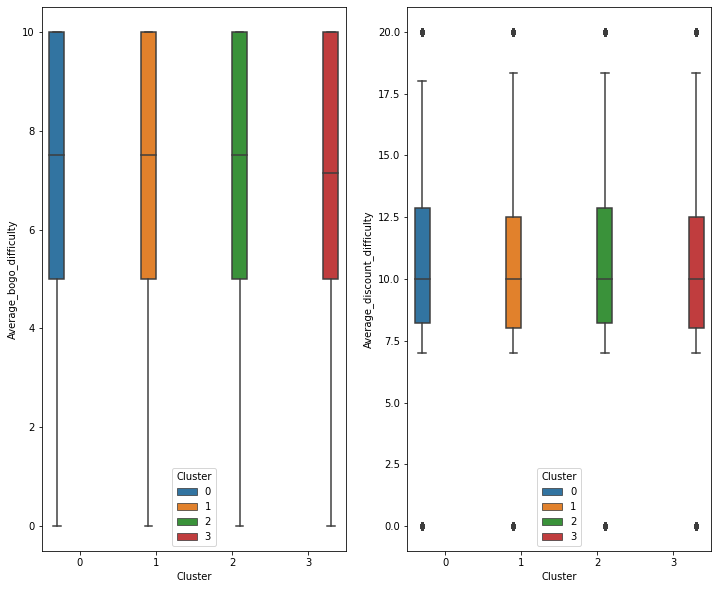

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize = (12, 10) ,squeeze=False)
sns.boxplot(data = df,x='Cluster',y="Average_bogo_difficulty", hue = 'Cluster', ax=axes[0,0])
sns.boxplot(data = df,x='Cluster',y="Average_discount_difficulty", hue = 'Cluster', ax=axes[0,1])



Difficulty levels across all the clusters for BOGO and discount offers seems pretty close.So we cannot segment customers
based on how they reacted to difficulty level.

## Cluster 0:
This Cluster on an average seems to be the second biggest spenders with an age range between 35-80 with relatively 
high income than other clusters.Surprisingly this cluster did receive much bogo and discount offers.But relatively success 
percentage of them using these offers is highest among all the clusters.

    
## Cluster 1:
Customers in this cluster is spread across different age ranges and consist of lots of male customers.
Interestingly, we also see that this particular group gets hit hard with offers, spiking big time around 5 offers sent.
This cluster got highest BOGO and discount offers and taking a closer look, it looks like there's a stronger 
leaning toward discount offers over BOGO offers.


## Cluster 2:
This cluster has a younger crowd with low average income and least average spending. 
But this cluster is slightly less responsive relative to the amount of offers sent which is in par with cluster 3 
but still the success percentage of them using the offers is the lowest. 
Since the success percentage is quite low here there is a room for lot of improvements.


## Cluster 3:
This cluster seems to be the biggest spenders and a soaring success percentage of using these offers.
Total number of offers sent to these customers was around 5.
Customers in this clusters has relatively more bogo difficulty level but still the success percentage is beyond 0.6.
